# Watershed transform (digital image segmentation)

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Image segmentation

In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple image segments, also known as image regions or image objects (sets of pixels). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

The result of image segmentation is a set of segments that collectively cover the entire image, or a set of contours extracted from the image (edge detection). Each of the pixels in a region are similar with respect to some characteristic or computed property, such as color, intensity, or texture. Adjacent regions are significantly different with respect to the same characteristic(s). When applied to a stack of images, typical in medical imaging, the resulting contours after image segmentation can be used to create 3D reconstructions with the help of geometry reconstruction algorithms like marching cubes.

## Task definition and mathematical model

As stated above we are trying to find the partitioning of a digital image into multiple regions (sets of pixels).

Let $R$ represent the entire spatial region occupied by an image. We may view image segmantation as a process that partitions $R$ into $n$ subregions, $R_1$, $R_2$,..., $R_n$ such that:

(a) $\bigcup_{i=1}^nR_i=R$ $\iff$ the segmentation must be complete - every pixel must be in a region

(b) $R_i$ is a connceted set, for $i = 0, 1, 2, ..., n$ $\iff$ points in a region must be connected in a predefined sense (e.g., 8-connected)

(c) $R_{i} \cap R_{j} = \varnothing$, for all i and j, $i \neq j$ $\iff$ different regions must be $\textit{disjoint}$

(d) $Q(R_i) = \textnormal{TRUE}$, for $i = 0, 1, 2, ..., n$ $\iff$ pixels in a region must statisfy some property defined by prediacte $Q$ (e.g., intensity)

(e) $Q(R_{i} \cup R_{j}) = \textnormal{FALSE}$, for any $\textit{adjacent}$ regions $R_i$ and $R_j$ $\iff$ $\textit{adjacent}$ regions must be different in the sense of predicate $Q$,

where $Q(R_k)$ is a logical predicate defined over the points in set $R_k$ and $\varnothing$ is the null set. The symbols $\cup$ and $\cap$ represent set union and intersection, respectively. Two regions $R_i$ and $R_j$ are said to be $\textit{adjacent}$ if their union forms a connected set. If the set formed by the union of two regions is not connected, the regions are said to be $\textit{disjoint}$.

Thus, we see that the fundamental problem in segmentation is to partition an
image into regions that satisfy conditions (a) — (e). Segmentation algorithms
for monochrome images generally are based on one of two basic categories dealing
with properties of intensity values: $\textit{discontinuity}$ and $\textit{similarity}$. In the first category,
we assume that boundaries of regions are sufficiently different from each other, and
from the background, to allow boundary detection based on local discontinuities in
intensity. $\textit{Edge-based}$ segmentation is the principal approach used in this category.
$\textit{Region-based}$ segmentation approaches in the second category are based on partitioning an image into regions that are similar according to a set of predefined criteria.

## Optimum Global Thresholding Using Otsu's Method

Thresholding may be viewed as a statistical-decision theory problem whose objective is to minimize the average error incurred in assigning pixels to two or more
groups (also called classes). This problem is known to have an elegant closed-form
solution known as the $\textit{Bayes decision function}$. The solution is
based on only two parameters: the probability density function (PDF) of the intensity levels of each class, and the probability that each class occurs in a given application. Unfortunately, estimating PDFs is not a trivial matter, so the problem usually
is simplified by making workable assumptions about the form of the PDFs, such as
assuming that they are Gaussian functions. Even with simplifications, the process
of implementing solutions using these assumptions can be complex and not always
well-suited for real-time applications.

The approach in the following discussion, called Otsu’s method (Otsu 1979), is
an attractive alternative. The method is optimum in the sense that it maximizes the between-class variance, a well-known measure used in statistical discriminant analysis. The basic idea is that properly thresholded classes should be distinct with respect to the intensity values of their pixels and, conversely, that a threshold giving the
best separation between classes in terms of their intensity values would be the best
(optimum) threshold. In addition to its optimality, Otsu’s method has the important
property that it is based entirely on computations performed on the histogram of an
image, an easily obtainable 1-D array.

Otsu's method, named after Nobuyuki Otsu (大津展之, Ōtsu Nobuyuki), is used to perform automatic image thresholding. In the simplest form, the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. This threshold is determined by minimizing intra-class intensity variance, or equivalently, by maximizing inter-class variance. Otsu's method is a one-dimensional discrete analogue of Fisher's discriminant analysis, is related to Jenks optimization method, and is equivalent to a globally optimal k-means performed on the intensity histogram.

<img src="understanding_otsu/screenshot_histogram_otsu.png"/>

The algorithm exhaustively searches for the threshold that minimizes the intra-class variance, defined as a weighted sum of variances of the two classes:

$\sigma_{w}^2(t) = \omega_{0}(t)\sigma_{0}^2(t) + \omega_{1}(t)\sigma_{1}^2(t)$

Weights $\omega_0$ and $\omega_1$ are the probabilities of the two classes seperated by a threshold $t$ and $\sigma_{0}^2$ amd $\sigma_{1}^2$ are variances of the two classes.

The class probablitiy $\omega_{\{0, 1\}}(t)$ is computed from the $L$ bins of the histogram:

$\omega_{0}(t) = \sum_{i=0}^{t-1}p(i)$,  $\omega_{1}(t) = \sum_{i=t}^{L-1}p(i)$

For 2 classes, minimizing the intra-class variance is equivalent to maximizing inter-class variance:

$\sigma_{b}^2(t) = \sigma^2 - \sigma_{w}^2(t) = \omega_{0}(t)(\mu_{0}-\mu_{T}^2) + \omega_{1}(t)(\mu_{1}-\mu_{T}^2) = \omega_{0}(t)\omega_{1}(t)[\mu_{0}(t)-\mu_{1}(t)]^2$

which is expressed in terms of class probablities $\omega$ and class means $\mu$, where: 

$\mu_{0}(t) = \frac{\sum_{i=0}^{t-1}ip(i)}{\omega_{0}(t)}$, $\mu_{1}(t) = \frac{\sum_{i=t}^{L-1}ip(i)}{\omega_{1}(t)}$, $\mu_{T} = \sum_{i=0}^{L-1}ip(i)$

The following relations can easily be verified:

$\omega_{0}\mu_{0} + \omega_{1}\mu_{1} = \mu_{T}$

$\omega_{0} + \omega_{1} = 1$ 

The class probabilities and class means can be computed iteratively. This idea yields an effective algorithm:

(1) Compute histogram and pobabilities of each intensity level

(2) Set up initial $\omega_{i}(0)$ and $\mu_{i}(0)$

(3) For all possible thresholds $t = 1, ...,$ $maximum$ $intensity$ do:
        (1) Update $\omega_{i}$ and $\mu_{i}$
        (2) Compute $\sigma_{b}^{2}(t)$

(4) Desired threshold $t^{*}$ corresponds to the maximum $\sigma_{b}^2(t)$

Once $t^{*}$ has been obtained, input image $f(x, y)$ is segmented as follows:

$g(x, y)= 
\begin{cases}
    1,              & f(x, y) > t^{*}\\
    0,              & f(x, y) \leq t^{*}
\end{cases}$

<img src="understanding_otsu/original_f(x,y).jpg"/> $\implies$ <img src="understanding_otsu/binary_g(x,y).jpg"/>

## Morphological Opening

Opening and closing are two important operators from mathematical morphology. They are both derived from the fundamental operations of erosion and dilation. Like those operators they are normally applied to binary images, although there are also graylevel versions. The basic effect of an opening is somewhat like erosion in that it tends to remove some of the foreground (bright) pixels from the edges of regions of foreground pixels. However it is less destructive than erosion in general. As with other morphological operators, the exact operation is determined by a structuring element (kernel). The effect of the operator is to preserve foreground regions that have a similar shape to this structuring element, or that can completely contain the structuring element, while eliminating all other regions of foreground pixels.

Dilation is one of the two basic operators in the area of mathematical morphology, the other being erosion. The basic effect of the operator on a binary image is to gradually enlarge the boundaries of regions of foreground pixels (i.e. white pixels, typically). Thus areas of foreground pixels grow in size while holes within those regions become smaller. On the other hand the effect of erosion is to erode away those boundaries. In contrast to dilation areas of foreground pixels shrink in size, and holes within those areas become larger.

Suppose that $X$ is the set of Euclidean coordinates corresponding to the input binary image and that $K$ is the set of coordinates for the structuring element. Let $Kx$ denote the translation of $K$ so that its origin is at $x$. Then the dilation of $X$ by $K$ is simply the set of all points $x$ such that $Kx \cap X \neq \varnothing$, while the erosion is the set of all points $x$ such that $Kx \subseteq X$.

An opening is defined as an erosion followed by a dilation using the same structuring element $K$ for both operations. The opening operator therefore requires two inputs: an image to be opened, and a structuring element. Opening is the dual of closing, i.e. opening the foreground pixels with a particular structuring element $K$ is equivalent to closing the background pixels with the same element. The erosion operation removes objects that are smaller than structuring element $K$ and the dilation operation (approximately) restores the size and shape of the remaining objects. However, restoration accuracy in the dilation operation depends highly on the type of structuring element and the shape of the objects being restored.

Opening removes small objects from the foreground (usually taken as the bright pixels) of an image, placing them in the background, while closing removes small holes in the foreground, changing small islands of background into foreground. These techniques can also be used to find specific shapes in an image. Opening can be used to find things into which a specific structuring element can fit (edges, corners, ...). 

Effect of opening with a $K_{3\times3}$ square structuring element:

<img src="understanding_opening/before_opening.gif"/> $\implies$ <img src="understanding_opening/after_opening.gif"/>

The "salt" noise has been entirely removed with relatively little degradation of the underlying image. However, if the noise consists of dark points ("pepper" noise) then no noise will be removed, using opening and it can even increase. In that case the usage of graylevel closing might be more appropirate.

## Watershed

In the study of image processing, a watershed is a transformation defined on a grayscale image. The name refers metaphorically to a geological watershed, or drainage divide, which separates adjacent drainage basins. The watershed transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

<img src="understanding_watershed/mathworks_syntethic_dark_blobs.jpg"/> $\iff$ <img src="understanding_watershed/mathworks_syntethic_dark_blobs_topographic_surface.jpg"/>

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. You start filling every isolated valley (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys with different colors will start to merge. To avoid that, you build barriers (dams) in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created give you the segmentation result.

<img src="understanding_watershed/book_dam_construction_via_dilation.jpg"/>

The watershed segmentation working on a grayscale image was introduced by F. Meyer in 1994. During sucessive flooding of the grey value relief, watersheds with adjacent catchment basins are constructed. This flooding process is performed on the gradient image, i.e. the basins should emerge along the edges.

(1) A set of pixels where the flooding should start are chosen. Each is given a different label.

(2) The neighbouring pixels of each marked area are inserted into a priority queue with a priority level corresponding to the gradient magnitude of the pixel.

(3) The pixel with the lowest priority level is extracted from the priority queue. If the neighbours of the extracted pixel that have already been labeled all have the same label, then the pixel is labeled with their label. All non-marked neighbours that are not yet in the priority queue are put into the priority queue.

(4) Repeat (3) until the priority queue is empty.

(5) The non-labeled pixels are the watershed lines.

<img src="understanding_watershed/gradient_flooding.jpg"/>

But this approach gives you oversegmented result due to noise or any other irregularities in the image. Oversegmentation occurs because every regional minimum, even if tiny and insignificant, forms its own catchement basin. Either the image must be pre-processed or the regions must be merged on the basis of a similarity criterion afterwards.

Example of watershed oversegmenation caused by local minima present in the raw unprocessed image of steel grains:

<img src="understanding_watershed/mathworks_steel_grains.jpg"/> $\implies$ <img src="understanding_watershed/mathworks_steel_grains_oversegmentation.jpg"/>

## The use of markers

Direct application of the watershed segmentation algorithm in the form discussed
in the previous section generally leads to oversegmentation, caused by noise and
other local irregularities of the gradient. As the example above illustrates, over-segmentation
can be serious enough to render the result of the algorithm virtually useless. In this
case, this means a large number of segmented regions. A practical solution to this
problem is to limit the number of allowable regions by incorporating a preprocessing stage designed to bring additional knowledge into the segmentation procedure. An approach used to control oversegmentation is based on the concept of markers.

A marker is a connected component belonging to an image. We have internal
markers, associated with objects of interest, and external markers, associated with
the background. A procedure for marker selection typically will consist of two principal steps: 1) preprocessing; and 2) definition of a set of criteria that markers must satisfy. Part of the problem that led to the oversegmented result in the above example is the large number of potential minima. Because of their size, many of these minima are irrelevant detail. An effective method for minimizing the effect of small spatial detail is to filter the image with a smoothing filter.

Suppose that we define an internal marker as 1) a region that is surrounded by
points of higher “altitude”; 2) such that the points in the region form a connected
component; and 3) in which all the points in the connected component have the
same intensity value. The external markers effectively partition the image into regions,
with each region containing a single internal marker and part of the background.
The problem is thus reduced to partitioning each of these regions into two: a single
object, and its background. We can bring to bear on this simplified problem
the segmentation techniques discussed in earlier sections.

OpenCV implemented a marker-based watershed algorithm where you specify which valley points are to be merged and which are not. It is an interactive image segmentation. We give different labels for the objects we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

## Code

We will first define a general parametric procedure, leveraging the cv2 library, which will allow us to easily experiment with different images and ways of approaching pre-processing and marker selection:

In [2]:
def watershed_transform(imgPath, iterOpening, iterDilation, heightThresh, boundaryRGB):
    #read image from the local path input parameter
    img = cv.imread(imgPath)
    #convert the input image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #find an approximate binary segmentation using Otsu's optimal threshold binarization
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    #remove noise using morphological opening with a 3x3 square structuring element
    kernel = np.ones((3,3), np.uint8)
    opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterOpening)
    #find the sure background area using dilation on the opening result with the same structuring element
    sure_bg = cv.dilate(opening, kernel, iterDilation)
    #find the sure foreground area using distance transform thresholding on the opening result
    dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
    ret, sure_fg = cv.threshold(dist_transform, heightThresh, 255, cv.THRESH_BINARY)
    #find the unknown region by substracting the background from the foreground
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg, sure_fg)
    #marker labeling
    ret, markers = cv.connectedComponents(sure_fg)
    #add 1 to all labels so that sure background is not 0, but 1
    markers_plus = markers + 1
    #mark the region of unknown with zero
    markers_plus[unknown==255] = 0
    #perform the watershed marker-based gradient flooding algorithm which will mark the boundary with -1
    markers_plus = cv.watershed(img, markers_plus)
    #set the boundary pixels to RGB color param value on the original image
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgRGB[markers_plus == -1] = boundaryRGB
    #plot each stage of the procedure
    images = [gray, thresh, opening,
              sure_bg, dist_transform, sure_fg,
              unknown, markers, markers_plus]
    titles = ['Grayscale','Otsu', 'Opening',
              'Dilated','Distance',
              'Thresholded',
              'Unknown','Markers',
              'Watershed']
 
    for i in range(9):
        plt.subplot(3,3,i+1), plt.imshow(images[i], (None, 'gray')[i < 7])
        plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.imshow(imgRGB)
    plt.title('Segmentation'), plt.xticks([]), plt.yticks([])

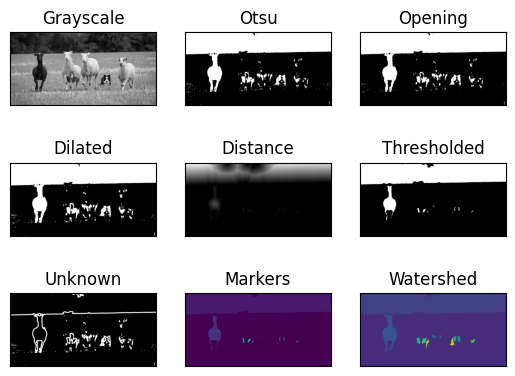

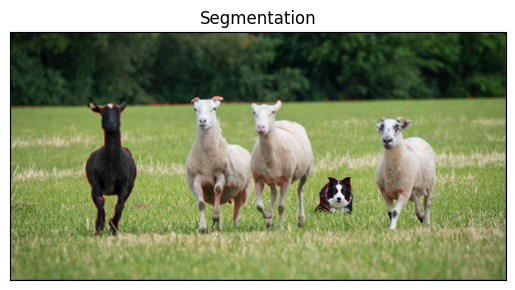

In [3]:
watershed_transform('test_images//sheep_and_dog_2.jpg', 2, 3, 10, [255, 0, 0])